# Cancer dataset

## Initial imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()
print("cancer keys: \n{}".format(cancer.keys()))

cancer keys: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [5]:
cancer.data.shape

(569, 30)

In [6]:
# np.bincount -->  Count number of occurrences of each value in array of non-negative ints.
print("Sample counts per class:\n{}".format(
        {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, 
                                                    test_size=.3, random_state=0)

In [9]:
pd.Series(y_test).value_counts()

1    107
0     64
dtype: int64

In [14]:
%%timeit
train_accuracy = []
test_accuracy = []

for n_neighbors in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

48 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


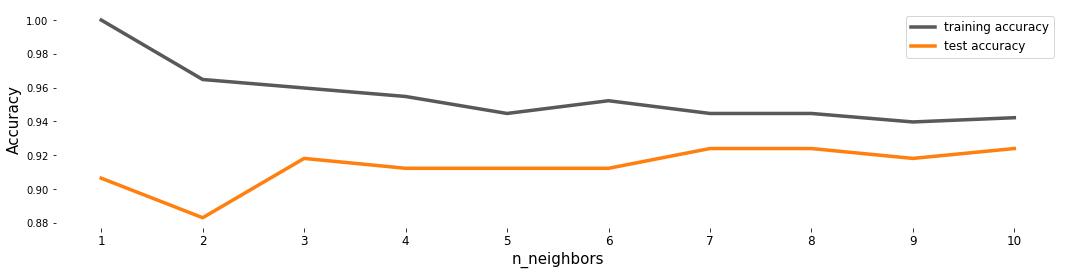

In [34]:
fig, ax = plt.subplots(figsize=(18,4))

rgb_dark = (89/255,89/255,89/255)
rgb_orange = (255/255,128/255,14/255)

ax.plot(range(1,11), train_accuracy, label='training accuracy', c=rgb_dark, linewidth=3.5)
ax.plot(range(1,11), test_accuracy, label='test accuracy', c=rgb_orange, linewidth=3.5)
ax.set_xlabel('n_neighbors', fontsize=15); plt.ylabel('Accuracy', fontsize=15)
ax.set_xticks(range(1,11))
ax.set_xticklabels(range(1,11), fontsize=12)

for k,spine in ax.spines.items():
    spine.set_visible(False)

plt.legend(fontsize=12)
plt.show()

In [51]:
len(train_accuracy)

10